In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set the random seed for reproducibility
np.random.seed(42)

# Load datasets
train_data = pd.read_csv("heart_disease_train.csv")
test_data = pd.read_csv("heart_disease_test.csv")

In [3]:
train_data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0


In [4]:
train_data.tail()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,0,47,1.0,0,0.0,0.0,0,0,0,266.0,107.0,77.0,30.61,75.0,64.0,0
3386,0,49,1.0,1,NaN,0.0,0,1,0,214.0,172.0,111.0,40.51,80.0,70.0,1
3387,1,54,2.0,1,30.0,0.0,0,0,0,215.0,117.5,70.5,26.77,60.0,75.0,0
3388,1,48,2.0,0,0.0,0.0,0,0,0,263.0,114.0,80.0,25.14,80.0,77.0,0
3389,1,46,1.0,0,0.0,0.0,0,1,0,235.0,136.5,92.0,22.92,68.0,89.0,0


In [5]:
test_data.head()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,56,1.0,0,0.0,0.0,0,1,1,273.0,136.0,80.0,27.73,90.0,210.0,1
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,0,52,1.0,0,0.0,0.0,0,0,0,275.0,112.0,71.0,25.68,80.0,NaN,0
3,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
4,1,69,1.0,1,1.0,0.0,0,0,0,245.0,123.0,77.0,26.58,70.0,81.0,1


In [6]:
test_data.tail()

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
843,0,61,1.0,0,0.0,1.0,0,1,1,265.0,200.0,125.0,29.50,68.0,256.0,1
844,0,54,2.0,0,0.0,0.0,1,0,0,321.0,150.0,93.0,22.50,75.0,131.0,0
845,1,39,1.0,1,30.0,0.0,0,0,0,292.0,120.0,85.0,31.09,85.0,NaN,0
846,1,68,1.0,0,0.0,0.0,0,1,1,184.0,157.0,97.0,33.16,110.0,148.0,1
847,0,48,3.0,1,20.0,0.0,0,0,0,253.0,105.0,59.0,19.42,62.0,83.0,0


In [7]:
# Prepare training and test sets
X_train = train_data.drop(columns=['TenYearCHD'])
y_train = train_data['TenYearCHD'].values
X_test = test_data.drop(columns=['TenYearCHD'])
y_test = test_data['TenYearCHD'].values

In [8]:
# Fill missing values with column mean
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())

In [9]:
mean = X_train.mean()
std = X_train.std()
# Normalize features (z-score normalization)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [10]:
# Add bias term (intercept) to X
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [11]:
# Initialize weights
m, n = X_train.shape
weights = np.random.randn(n) * 0.01
learning_rate = 0.1
epochs = 10

In [12]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [13]:
# Cost function
def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(X.dot(weights))
    cost = (-1 / m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

In [14]:
# Gradient descent with logistic regression
def gradient_descent(X, y, weights, learning_rate, epochs):
    m = len(y)
    cost_history = []

    for epoch in range(epochs):
        predictions = sigmoid(X.dot(weights))
        error = predictions - y
        gradient = (1 / m) * X.T.dot(error)
        weights -= learning_rate * gradient
        
        # Calculate and print cost
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        print(f"Epoch {epoch + 1}, Cost: {cost:.4f}")

    return weights, cost_history

In [15]:
# Train the model
optimal_weights, cost_history = gradient_descent(X_train, y_train, weights, learning_rate, epochs)

# Predict probabilities for training and test sets
train_probabilities = sigmoid(X_train.dot(optimal_weights))
test_probabilities = sigmoid(X_test.dot(optimal_weights))

Epoch 1, Cost: 0.6807
Epoch 2, Cost: 0.6671
Epoch 3, Cost: 0.6542
Epoch 4, Cost: 0.6422
Epoch 5, Cost: 0.6308
Epoch 6, Cost: 0.6202
Epoch 7, Cost: 0.6101
Epoch 8, Cost: 0.6006
Epoch 9, Cost: 0.5916
Epoch 10, Cost: 0.5831


In [16]:
# Function to calculate confusion matrix and metrics
def evaluate_performance(y_true, y_prob, threshold=0.5):
    y_pred = y_prob >= threshold
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    accuracy = (TP + TN) / len(y_true)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    return TP, TN, FP, FN, accuracy, precision, recall

In [17]:
# Evaluate performance for train and test datasets
train_metrics = evaluate_performance(y_train, train_probabilities)
test_metrics = evaluate_performance(y_test, test_probabilities)

# Print confusion matrix and metrics for train and test sets
print("\nTrain Metrics:")
print(f"Confusion Matrix: TP={train_metrics[0]}, TN={train_metrics[1]}, FP={train_metrics[2]}, FN={train_metrics[3]}")
print(f"Accuracy: {train_metrics[4]:.4f}, Precision: {train_metrics[5]:.4f}, Recall: {train_metrics[6]:.4f}")

print("\nTest Metrics:")
print(f"Confusion Matrix: TP={test_metrics[0]}, TN={test_metrics[1]}, FP={test_metrics[2]}, FN={test_metrics[3]}")
print(f"Accuracy: {test_metrics[4]:.4f}, Precision: {test_metrics[5]:.4f}, Recall: {test_metrics[6]:.4f}")


Train Metrics:
Confusion Matrix: TP=88, TN=2753, FP=121, FN=428
Accuracy: 0.8381, Precision: 0.4211, Recall: 0.1705

Test Metrics:
Confusion Matrix: TP=24, TN=682, FP=38, FN=104
Accuracy: 0.8325, Precision: 0.3871, Recall: 0.1875


In [18]:
# Calculate ROC curve points
def calculate_roc(y_true, y_prob):
    thresholds = np.linspace(0, 1, num=100)
    tpr_list = []
    fpr_list = []

    for threshold in thresholds:
        y_pred = y_prob >= threshold

        TP = np.sum((y_true == 1) & (y_pred == 1))
        FP = np.sum((y_true == 0) & (y_pred == 1))
        TN = np.sum((y_true == 0) & (y_pred == 0))
        FN = np.sum((y_true == 1) & (y_pred == 0))

        tpr = TP / (TP + FN) if (TP + FN) > 0 else 0
        fpr = FP / (FP + TN) if (FP + TN) > 0 else 0

        tpr_list.append(tpr)
        fpr_list.append(fpr)

    return fpr_list, tpr_list

In [19]:
# Calculate AUC using the trapezoidal rule
def calculate_auc(fpr, tpr):
    auc = 0.0
    for i in range(1, len(fpr)):
        auc += 0.5 * abs(tpr[i] + tpr[i-1]) * abs(fpr[i] - fpr[i-1])
    return auc

In [20]:

# Compute ROC and AUC for train and test sets
fpr_train, tpr_train = calculate_roc(y_train, train_probabilities)
fpr_test, tpr_test = calculate_roc(y_test, test_probabilities)

auc_train = calculate_auc(fpr_train, tpr_train)
auc_test = calculate_auc(fpr_test, tpr_test)

# Print AUC results
print(f"AUC for Training set: {auc_train:.4f}")
print(f"AUC for Test set: {auc_test:.4f}")

AUC for Training set: 0.7086
AUC for Test set: 0.7395


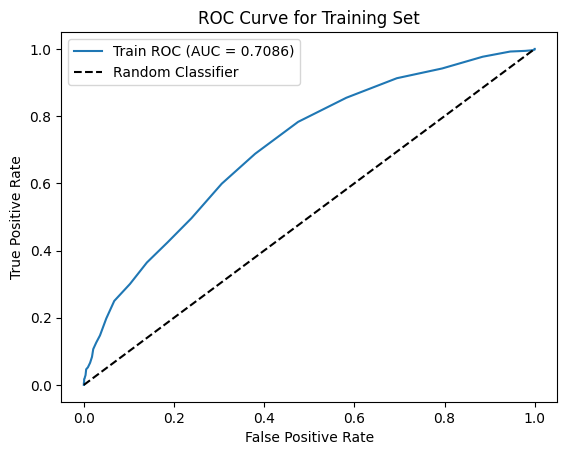

In [21]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {auc_train:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Baseline for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Set')
plt.legend()  
plt.show()

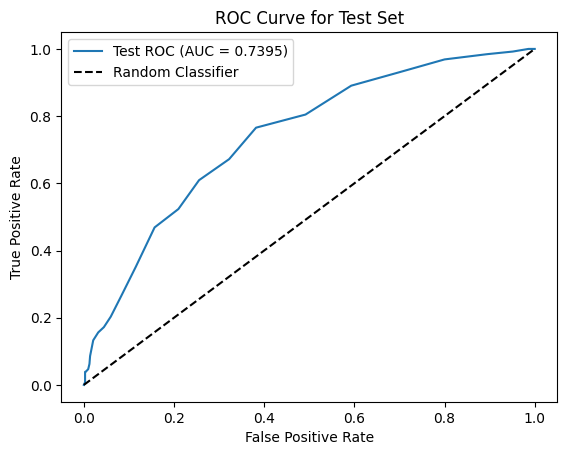

In [22]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Baseline for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Test Set')
plt.legend()  
plt.show()